# Introduction

The purpose of this work will be to investigate the 'heart.csv' dataset provided on Kaggle to try predicting the presence of heart disease in the patients. This data can be found [here](https://www.kaggle.com/andrewmvd/fetal-health-classification) from Kaggle and further informaiton is available directly from the [source](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) (the Center for Machine Learning and Intelligent Systems).

# The Data

The first step when working with a new dataset is always to better understand the dataset such as the different features, missing data, and any peculiar characteristics. To do that, let us import and look over the data:

In [1]:
import pandas as pd

file_path = '../input/heart.csv'
heart_df = pd.read_csv(file_path)
print(f"Number of Patients: {heart_df.shape[0]}")
print(f"Number of Columns: {heart_df.shape[1]}")
print(f"Missing Data: None")

Number of Patients: 303
Number of Columns: 14
Missing Data: None


In [2]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
column_detailed_descriptions = {
  "age": "The patient's age in years. Lowest is 29, highest is 77.",
  "sex": "The sex of the patient where Female was represented with a 0 and Male was represented as a 1.",
  "cp": "cp is a categorical variable and represents the type of chest pain the patient had. The values are the integers 0-3 and they represent the following respectively: Typical Angina, Atypical Angina, Non-anginal Pain, and Asymptomatic.",
  "trestbps": "trestbps here is defined as the patient's 'resting blood pressure (in mm Hg on admission to the hospital)'. Blood pressure is typically recorded as a pair of numbers such as 120/80 representing a systolic pressure of 120mm Hg and a diastolic pressure of 80mm Hg. Only one number is provided in our data, so I am not sure which number it corresponds to (systolic or diastolic). Regardless, we know that anything above 120 is definitely not in a healthy range.",
  "chol": "chol here is the patient's measure of serum cholesterol in mg/dL. Serum cholesterol is calculated by adding the HDL level, the LDL level, and 20 percent of the triglyceride level present in a blood sample. In general, lower chol values are healthier.",
  "fbs": "fbs represents the patient's fasting blood sugar level. This value is encoded as a 1 if the fasting blood sugar was measured to be over 120mg/dL and 0 if not. For reference, if a fasting blood sugar level over 126mg/dL is measured on two separate tests, the patient has diabetes, so high values are not a sign of good health.",
  "restecg": "restecg is a categorical variable represents the patient's resting electrocardiographic results where the results are encoded as as the integers 0-2: 0-Normal/Healthy Results, 1-having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2-showing probable or definite left ventricular hypertrophy by Estes' criteria.",
  "thalach": "I have no idea what 'thalach' is shorthand for, but it is a measure of the patient's maximum heart rate measured. A normal resting heart rate for adults ranges from 60 to 100 beats per minute, but is directly related to age. In general, higher values here will indicate more likely risks.",
  "exang": "This is a boolean encoding for 'excercise induced angina'. This value is stored as a 1 if chest pain is caused by excercise and stored as 0 otherwise. This can occur because excercise increases your body's demand of oxygen.",
  "oldpeak": "oldpeak is a decimal number between 0 and 6.2 (from our data). It is defined as the 'ST depression induced by exercise relative to rest.' From the National Center for Biotechnology Information, 'Deeper and more widespread ST depression generally indicates more severe or extensive disease.' Based on this description, I believe that higher magnitude values of oldpeak will correlate with higher risk.",
  "slope": "slope is categorically encoded as one of three values (0, 1, 2) based on the slope of the peak exercise ST segment: 0-upsloping, 1-flat, 2-downsloping.",
  "ca": "This value is the number of major vessels (0-3) that were colored by flouroscopy. Fluoroscopy detects movement such as the flow of blood. My interpretation is that the number of vessels that are colored should be the vessels functioning properly, and are not blocked. Based on the distribution of values though, I think my interpretation is the opposite of correct. We will see later if high values for this feature positively or negatively correlate with our target.",
  "thal": "I believe thal is a measure of a thallium stress test (also known as a nuclear stress test?) as this can show areas of poor blood flow or damage in a heart. Additionally there is a little bit of confusion in the values held by this feature. The data source gives the following value/descriptions: 'value 3 = normal; 6 = fixed defect; 7 = reversable defect' but the values actually held are 0, 1, 2, and 3. It is likely that these values are categorical, but other than that they are not immediately understood.",
  "target": "The target field refers to the presence of heart disease in the patient. In the original dataset this field valued from 0 (no presence) to 4 determined by the severity of the heart disease. Now, however, all severities of heart disease have been combined into the value 1 and 0 has been kept as 0 to separate any heart disease from no heart disease."
}

We can see that we have 14 columns and 303 observations. Some of the columns are intuitive like <b>age</b> and <b>sex</b>, but let's look into each column with a little bit more detail.

| Column Name| Given Description | Data-Type | Domain | Mode-Count | Mean | Std Dev |
| :- | -: | :-: | :-: | :-: | :-: | :-: |
| age | age in years | Integer | 29-77 | - | 54 | 9 |
| sex | sex (1 = male; 0 = female) | Categorical-Boolean | 0, 1 | 1-207 | - | - |
| cp | chest pain type | Categorical-Nominal | 0, 1, 2, 3 | 0-143 | - | - |
| trestbps | resting blood pressure (in mm Hg on admission to the hospital) | Real | 94-200 | - | 131 | 17 |
| chol | serum cholestoral in mg/dl | Real | 126-564 | - | 246 | 51 |
| fbs | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) | Categorical-Boolean | 0, 1 | 0-258 | - | - |
| restecg | resting electrocardiographic results | Categorical-Nominal | 0, 1, 2 | 1-152 | - | - |
| thalach | maximum heart rate achieved | Real | 71-202 | - | 149 | 22 |
| exang | exercise induced angina (1 = yes; 0 = no) | Categorical-Boolean | 0, 1 | 0-204 | - | - |
| oldpeak | ST depression induced by exercise relative to rest | Real | 0-6.2 | 0-99 | 1 | 1 |
| slope | the slope of the peak exercise ST segment | Categorical-Nominal | 0, 1, 2 | 2-142 | - | - |
| ca | number of major vessels (0-3) colored by flourosopy | Categorical-Ordinal | 0, 1, 2, 3, 4 | 0-175 | - | - |
| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect | Categorical-Nominal | 0, 1, 2, 3 | 2-166 | - | - |
| target | the presence of heart disease in the patient | Categorical-Boolean | 0, 1 | 1-165 | - | - |

In [4]:
import ipywidgets as widgets
import seaborn as sns

w = widgets.ToggleButtons(
    options=heart_df.columns,
    description='Column:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']
)

def plot_feature(w):
    # determine unique counts
    n_unique = heart_df[w].nunique()
    # if less than 7, plot countplot
    if n_unique < 7:
        sns.countplot(x=w, data = heart_df).set_title(f"{w} Countplot");
    # otherwise plot histogram
    else:
        sns.histplot(heart_df[w]).set_title(f'{w} Histogram');
    print(column_detailed_descriptions[w]) 

In [5]:
out_plot = widgets.interactive_output(plot_feature, {'w': w})
widgets.VBox([w, out_plot])

# Initial Thoughts

It is important to have some domain knowledge before blindly working with the data to better understand results and catch unusual instances. According to heart.org, risk factors for heart disease fall into three categories [[1](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)]: 
1. Major risk factors – Research has shown that these factors significantly increase the risk of heart and blood vessel (cardiovascular) disease.
    - <b>Increasing Age</b>
    - <b>Male Gender</b>
2. Modifiable risk factors – Some major risk factors can be modified, treated, or controlled through medications or lifestyle change.
    - <b>Increasing Cholesterol</b>
        - "As we age, cholesterol levels tend to climb. Men are generally at a higher risk than women for higher cholesterol. However, a woman’s risk goes up after she enters menopause." [[2](https://www.healthline.com/health/high-cholesterol/levels-by-age#adults)]
    - <b>Increasing Blood Pressure</b>
        - “As you age, the vascular system changes. This includes your heart and blood vessels. In the blood vessels, there’s a reduction in elastic tissue in your arteries, causing them to become stiffer and less compliant. As a result, your blood pressure increases,” [[3](https://www.healthline.com/health-news/high-blood-pressure-in-older-age-ways-to-lower-risk#Why-it-happens)]
3. Contributing risk factors – These factors are associated with increased risk of cardiovascular disease, but their significance and prevalence haven’t yet been determined.
    - Stress
    - Alcohol
    - Diet
    - Nutrition
    
From this reading, we can see that heart disease is closely related to blood pressure and the flow of blood around the heart. Therefore I expect <b>thalach</b> and <b>ca</b> to be important features. Additionally, <b>age</b>, <b>sex</b>, <b>trestbps</b>, <b>fbs</b>, and <b>chol</b> will likely be important factors as well. 

# Features vs Target

Now let's actually look at our data for correlations with the target and any potential issues such as outliers. We only have data on 303 patients, so hoefully we do not need to remove any of this data.

## Age

We expect age to strongly correlate with an increase in heart disease. Let's see if that assumption holds true.

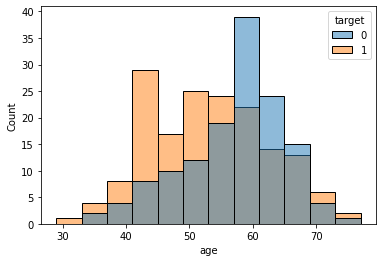

In [6]:
import matplotlib.pyplot as plt
sns.histplot(data = heart_df, x='age', hue='target');

Interestingly, the percentage of patients at lower ages having heart disease is extremely high. For instance, 66 of the 95 patients (69%) at or below 50 years of age have heart disease. On the otherhand, only 99 of the 208 patients (47%) over the age of 50 have heart disease. Based on this data we would believe that a patient is less likely to develop heart disease aa they get older. It is clear that our data is biased, and that few younger patients were included in this dataset with healthy results. Therefore, we should <b>not</b> include age as a feature in our model. We may include it when performing feature engineering with other features, but not directly. Otherwise, our model will be very bad on unseen data when taking age into consideration.

## Sex

Based on our research we expect men to be more likely to have heart disease. If our data shows otherwise, we would likely have a bias in our data as we did with age.

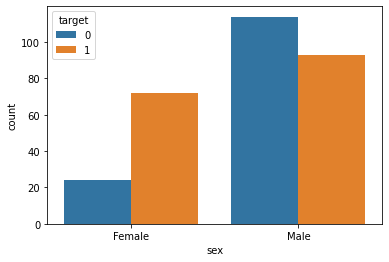

In [7]:
sns.countplot(x="sex", hue="target", data=heart_df)
plt.xticks([0, 1], ['Female', 'Male']);

Unfortunately we again have a clear bias with our given data. Published data states that men are more likely to have heart disease than women, however, a random man in our dataset has heart disease 45% of the time and a random female has heart disease 75% of the time. Just like with the feature <b>age</b>, we will not be using <b>sex</b> as a feature in our model due to this clear bias.

## Chest Pain Type (cp)

We have little data on Asymptomatic patients, but I would expect them to be unlikely to have heart disease. I would expect Typical Angina pain to be a strong indicator of heart disease.

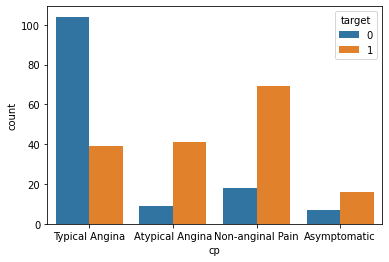

In [8]:
sns.countplot(x="cp", hue="target", data=heart_df)
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);

I worry about including this data as well. My understanding of Asymptomatic is a patient not experiencing pain. If a random person was tested and was not experiencing any pain, I would not expect them to be 69% likely to have heart disease where someone with chest pain is only 27% likely to have heart disease. Again, there is a clear bias in this data.

In [9]:
heart_df[heart_df['cp'] == 0]['target'].sum()

39

## Resting Blood Pressure (trestbps)

We expect a higher trestbps to correlate wtih an increase in likelihood of heart disease.

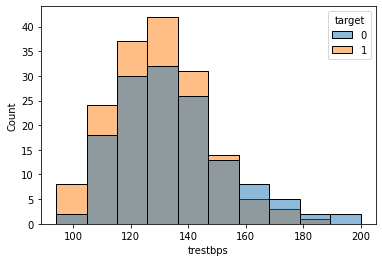

In [10]:
sns.histplot(data = heart_df, x='trestbps', hue='target', bins=10);

Surprisingly the bins beneath 150 are all more likley to have heart disease than not, while the bins above are all less likely to have heart disease. Due to the concerns of bias in the previous features, it is difficult to feel confident of reliable data for any feature that has unexpected results.

## Serum Cholesterol (chol)

We expect a higher chol to correlate with an increase in likelihood of heart disease.

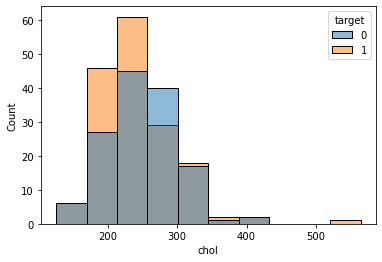

In [11]:
sns.histplot(data = heart_df, x='chol', hue='target', bins=10);

## Fasting Blood Sugar (fbs)

We would expect a patient with a high fasting blood sugar to be more likely to have heart disease than a patient with low fasting blood pressure.

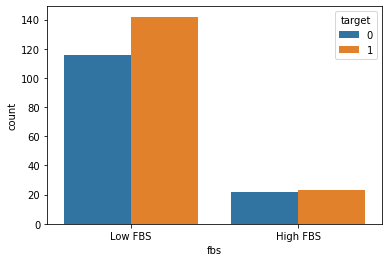

In [12]:
sns.countplot(x="fbs", hue="target", data=heart_df)
plt.xticks([0, 1], ['Low FBS', 'High FBS']);

Here we show that a pateint is more likely to have heart disease if they have a low fasting blood sugar level which contradicts medical knowledge[[4](http://www.diabetesincontrol.com/fasting-blood-sugar-above-90-puts-you-at-risk-of-heart-disease/#:~:text=Study%20shows%20a%20fasting%20BG,level%20below%2079%20mg%2Fdl.)]. This dataset needs more control data...

## Resting Electrocardiographic Results (restecg)

When restecg is 0 we expect the pateint to be healthy and not likely to have heart disease. The other cases, 1 and 2, are abnormalities and should be more likely to have heart disease than the normal case.

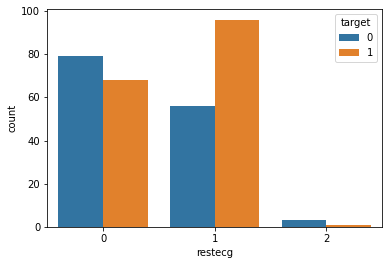

In [13]:
sns.countplot(x="restecg", hue="target", data=heart_df);

Fortunately the probability of having heart disease when restecg=1 is greater than the probability when restecg=0 as we should expect. Again, the probability of having heart disease with a healthy restecg value seems unrealistically high for the average person though, and shows a bias with the data.

## Maximum Heart Rate (thalach)

Higher should have some correlation to increased risk of heart disease.

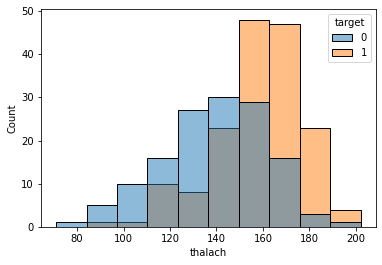

In [14]:
sns.histplot(data = heart_df, x='thalach', hue='target', bins=10);

Surprisingly useful looking data that follows the trend we would expect.

## Exercise Induced Angina (exang)
I would expect a patient that has chest pain when exercising to be more likely to have heart disease than a patient that does not have chest pain when exercising.

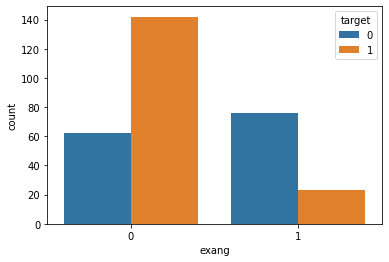

In [15]:
sns.countplot(x="exang", hue="target", data=heart_df);

My intuition appears to have been very wrong on this one. Our data shows that a patient that has no chest pain when exercising is more likely to have heart disease. Again... unless heart disease actually prevents/reduces chest pain when exercising, our dataset is bad.

## Oldpeak

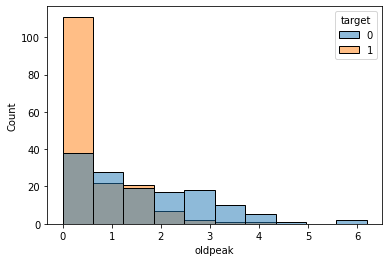

In [16]:
sns.histplot(data = heart_df, x='oldpeak', hue='target', bins=10);

## Slope

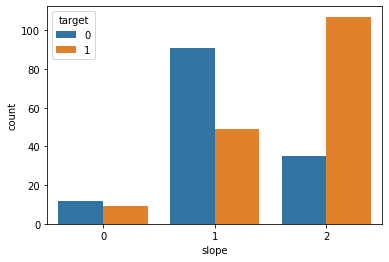

In [17]:
sns.countplot(x="slope", hue="target", data=heart_df);

## Number of Major Vessels Colored by Flourosopy (ca)

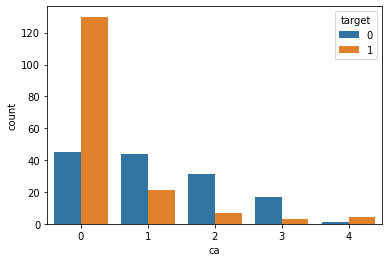

In [18]:
sns.countplot(x="ca", hue="target", data=heart_df);

I was unsure about the data before looking at it, and I was hoping that looking at the targets vs vessel count would help my understanding. My understanding is that the colored vessels should be the number of healthy vessels, however, based on the frequencies in our dataset I believe that I was incorrect. Unfortunately I think our dataset has a severe bias so I cannot make confident assumptions about this feature in either direction.

## Thal

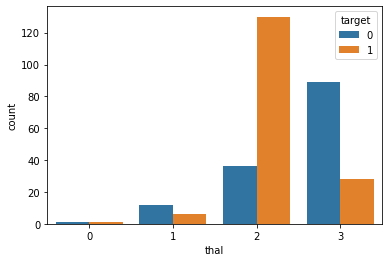

In [19]:
sns.countplot(x="thal", hue="target", data=heart_df);

I don't really know how to interpret this variable as I think that it is a nominal categorical variable. All I can tell is that values 0 and 1 are unlikely and value 2 is very likely to have heart disease in our dataset.

# Outlier Detection

Steps Taken:
1. Drop Categorical data - We will be using 1.5IQR to determine outliers. Categorical data cannot have outliers with this metric.
2. Plot data with outliers to visually show how many outliers for the different variables.
3. Determine which observations are outliers
4. Replot our data after removing the outliers to verify their correct removal.

## Drop Categorical Columns

In [20]:
# remove categorical data from outlier detection
cat_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
no_cat_df = heart_df.drop(columns=cat_columns + ["target"])

## Plot Original Data(Scaled)

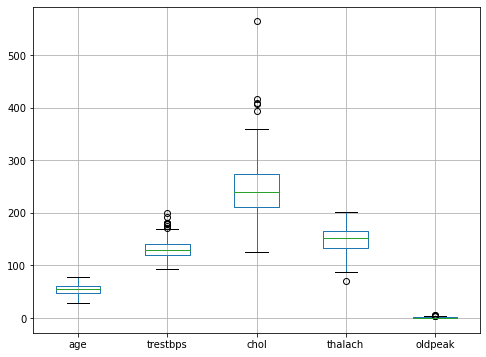

In [21]:
plt.figure(figsize=(8,6))
no_cat_df.boxplot();

A quick view of the outliers above gives the impression that all of these outliers are realistic measurements rather than incorrectly input data. For instance, if we had a heart rate measured at 0, we would know that that is incorrectly input data. The most suspicious looking datapoint would be the cholesteral value much further from the rest at over 500, however, that is still a humanly possible value.

## Determine which Observations (Rows) are Outliers

In [22]:
from collections import Counter

outlier_rows = Counter()
k=1.5

for col in no_cat_df:
    q1 = no_cat_df[col].quantile(.25)
    q3 = no_cat_df[col].quantile(.75)
    iqr = q3-q1
    lower_bound = q1-k*iqr
    upper_bound = q3+k*iqr
    
    mask = no_cat_df[col].between(lower_bound, upper_bound, inclusive=True)
    outlier_rows.update(mask[~mask].index.values)

outlier_idxs = list(outlier_rows)
print(len(outlier_idxs))

19


In total we had 19 unique observations that were outliers. All but one of these outliers is due to the patient having unusually high, and often dangerous, realistic measurements. The only observation that had two outlying features was patient 101. We can see from its data below that is an outlier due to its high trestbps and oldpeak values. Unsurprisingly, this patient has heart disease.

In [23]:
display(heart_df.iloc[[101]])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


Now, let us replot our boxplots from above to make sure that we have correctly located all outliers.

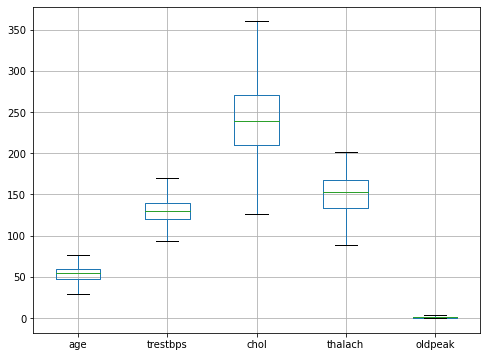

In [24]:
plt.figure(figsize=(8,6))
no_cat_df.drop(index=outlier_idxs).boxplot();

At this point we have correctly captured all of the observations that count as outliers. However, all of these observations are also realistic measurements, so we will not be blindly throwing them out. We will instead monitor the impact these observations have on our model accuracy later on.

# Clustering
At this point I am curious if there is any obvious clustering before we try fitting the data. We can follow the steps below to check for clustering in this case using PCA.

1. Preprocessing
    - One Hot Encode certain features
    - Scale values to the domain of [0, 1]
    - Drop features we do not plan on using in our models (like Age)
2. Reduce dimensionality using PCA
3. Plot

## Preprocessing

In [25]:
# We will keep our original dataset untouched by making a copy to work with.
# At the same time we are splitting out the target column to avoid modifying it.
x_df = heart_df.copy().drop(columns=["target"])
y_df = heart_df[["target"]].copy()

In [26]:
# One Hot Encoding
## Columns observed to be suitable for One Hot Encoding
# columns ["sex", "fbs", "exang"] do not need one hot encoding as they are already boolean values (0 or 1).
ohe_features = ["cp", "restecg", "slope", "thal"]
x_df = pd.get_dummies(x_df, columns=ohe_features)

In [27]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
## By default the scaler scales values into the range 0-1
scaler = MinMaxScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)

In [28]:
# Column Dropping
## Columns I have decided to drop based on above analysis:
## These drops are not meant to improve scores or ability to cluster this data. 
## I am dropping these columns because they seem biased in our dataset.
drop_features = ["age", "trestbps"]
x_df = x_df.drop(columns=drop_features)

In [29]:
x_df.head()

,sex,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1.0,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.178082,0.0,0.770992,0.0,0.225806,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.251142,0.0,0.816794,0.0,0.129032,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Reduce Dimensionality using PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(x_df)

pca_df = pd.DataFrame()
pca_df['pca-comp1'] = pca_results[:,0]
pca_df['pca-comp2'] = pca_results[:,1]
pca_df['y'] = y_df["target"].copy()

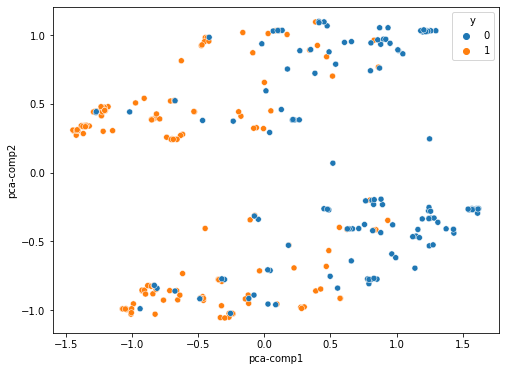

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca-comp1', y='pca-comp2',
    hue="y",
    data=pca_df,
    legend="full",
);

The results of PCA clustering somewhat separates the data into four quadrants with some noise in the middle. The top two quadrants seem to be a cluster different than the bottom two quadrants. Additionally, the right two quadrants seem more likely to not have heart disease, while the left two quadrants are less likely to have heart disease. We can repeat the PCA  analysis after removing the outliers to see if that impacts our ability to cluster at all.

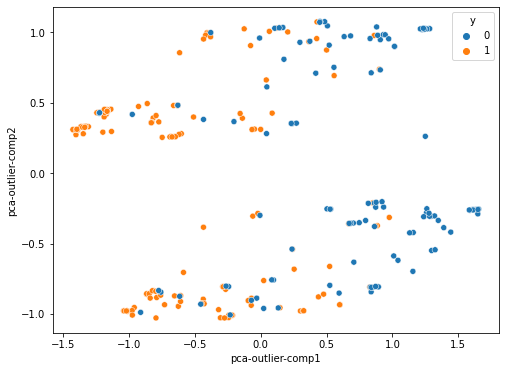

In [32]:
# drop outliers and reset the index afterwards (avoids some pandas errors)
x_df = x_df.drop(index=outlier_idxs).reset_index(drop=True)
y_df = y_df.drop(index=outlier_idxs).reset_index(drop=True)

pca_no_outliers = PCA(n_components=2)
pca_results = pca_no_outliers.fit_transform(x_df)

pca_no_outlier_df = pd.DataFrame()
pca_no_outlier_df['pca-outlier-comp1'] = pca_results[:,0]
pca_no_outlier_df['pca-outlier-comp2'] = pca_results[:,1]
pca_no_outlier_df['y'] = y_df["target"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca-outlier-comp1', y='pca-outlier-comp2',
    hue="y",
    data=pca_no_outlier_df,
    legend="full",
);

If we look closely we can see that some of noisy datapoints in the middle of the upper and lower clusters are now gone. This makes sense as our outliers should be quite unique compared to our other points. There are no significant visual differences though from removing the outliers.

## PCA in 3D

We can decompose our features to 3D and see if there is anything to be gained from including a 3rd dimension.

In [33]:
from mpl_toolkits.mplot3d import Axes3D

pca_no_outliers = PCA(n_components=3)
pca_results = pca_no_outliers.fit_transform(x_df)

pca_3D_df = pd.DataFrame()
pca_3D_df['pca-outlier-comp1'] = pca_results[:,0]
pca_3D_df['pca-outlier-comp2'] = pca_results[:,1]
pca_3D_df['pca-outlier-comp3'] = pca_results[:,2]
pca_3D_df['y'] = y_df["target"]

%matplotlib widget
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_3D_df['pca-outlier-comp1'],
               ys = pca_3D_df['pca-outlier-comp2'],
               zs = pca_3D_df['pca-outlier-comp3'],
               zdir='z', s=20, 
               c=pca_3D_df['y'], 
               depthshade=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

This does not provide us with any additional information. The only datapoints that seemed distinguishable from including a 3rd dimension are the noisy datapoints in between the main two clusters.

## Investigating our PCA

Now that we have looked over our PCA attempts and can see two distinct clusters (top and bottom) and a clear tendency for the left to have heart disease and the right to not have heart disease, we should determine what these axis represent. The way PCA works is that each axis is influenced by the different features of our original dataframe. We can investigate to see which features most heavily influenced our axes.

### PCA component 1 (x-axis)

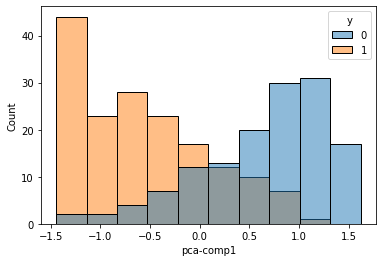

In [34]:
%matplotlib inline

sns.histplot(data=pca_df, x='pca-comp1', hue='y', bins=10);

We can clearly see that our x-axis is a strong indicator of whether the patient has heart disease or not. Let us see which features impact this axis.

In [35]:
pd.DataFrame(pca.components_[0].reshape(1, -1), columns=x_df.columns)

,sex,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.155171,0.010673,0.015832,-0.10012,0.31077,0.106681,0.08138,0.369268,-0.151234,-0.212168,...,0.179822,-0.187201,0.007379,0.025427,0.356282,-0.381709,0.000755,0.045067,-0.412058,0.366237


Looking at the first component which is represented above as the x-axis, we do not have a single feature that strongly controls this value. Instead we have the following with significant influence:

| Feature| Explained Variance | Interpretation |
| :- | -: | :-: |
| sex | 0.16 | Based on our populaiton set, being a male makes the patient less likely to have heart disease |
| exang | 0.31 | A patient experiencing exercise induced angina is less likely to have heart disease |
| cp_0 | 0.37 | If the patient is experiencing typical angina they are less likely to have heart disease |
| cp_1 | -0.15 | If the patient is experiencing atypical angina they are more likely to have heart disease |
| cp_2 | -0.21 | If the patient is experiencing non-anginal pain they are more likely to have heart disease |
| restecg_0 | 0.18 | Unsurprisingly, if the patient has normal resting electrocardiographic results, they are less likely to have heart disease |
| restecg_1 | -0.19 | If the patient has probable ST-T wave abnormality, they are mr elikely to have heart disease |
| slope_1 | 0.36 | If the patient has a flat ST segment during peak exercise, they are less likely to have heart disease |
| slope_2 | -0.38 | If the patient has a downsloping ST segment during peak exercise, they are much more likely to have heart disease |
| thal_2 | -0.41 | Unfortunately, we do not have a clear description for this feature, but it strongly correlates with an increase in heart disease |
| thal_3 | 0.37 | Unfortunately, we do not have a clear description for this feature, but it strongly correlates with a decrease in heart disease |

### PCA component 2 (y-axis)

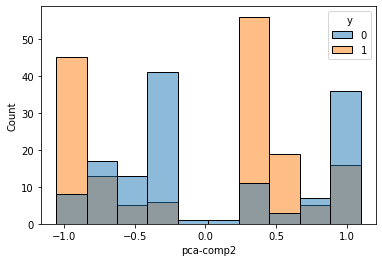

In [36]:
sns.histplot(data = pca_df, x='pca-comp2', hue='y', bins=10);

Unlike the x-axis, the y-axis (pca-comp2) is less useful for predicting whether a patient has heart disease or not.

In [37]:
pd.DataFrame(pca.components_[1].reshape(1, -1), columns=x_df.columns)

,sex,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.135323,-0.027753,-0.03106,-0.007,0.064001,0.004163,0.005803,0.052073,0.006435,-0.025619,...,-0.646632,0.649098,-0.002466,-0.009588,-0.028925,0.038513,0.000042,-0.006651,-0.250979,0.257589


The y-axis is mainly influenced by just two features: restecg and thal

| Feature| Explained Variance |
| :- | -: |
| restecg_0 | -0.65 |
| restecg_1 | 0.65 |
| thal_2 | -0.25 |
| thal_3 | 0.26 |

The y-axis does not seem to have a clear influence on whether or not the patient has heart disease, but it leads to two distinct clusters in our data. It appears that the y-axis is heavily influenced by the restecg and thal values. We can see that each feature is broken into two components of equal magnitudes but opposite signs. It is likely that these two components have high correlations. At this point I do not think there is much data to gather from the y-axis, and it is mostly based on these almost boolean categories. 

# Correlation
Let us set up correlation matrices for our data. We will separate out the categorical features that have more than two categories, but we do not need to scale any data as correlation is origin independent.


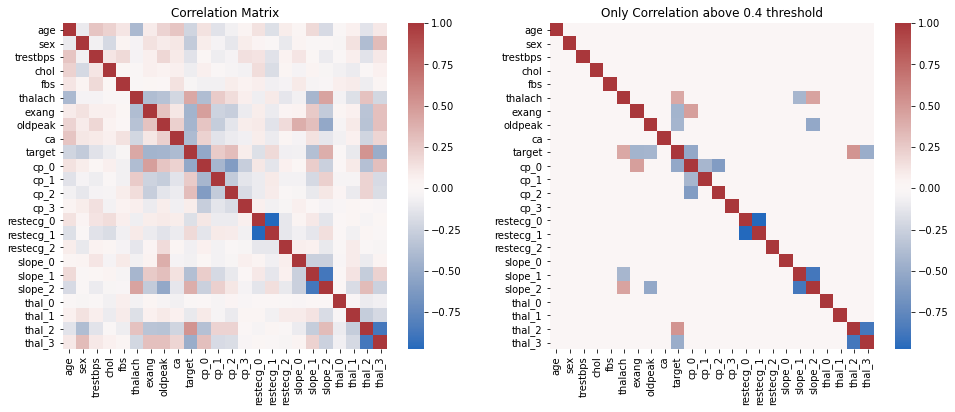

In [38]:
working_df = heart_df.copy()
ohe_features = ["cp", "restecg", "slope", "thal"]
working_df  = pd.get_dummies(working_df , columns=ohe_features)
corr_matrix = working_df.corr()

# plotting
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.heatmap(corr_matrix, cmap="vlag", xticklabels=1)
plt.title("Correlation Matrix")
plt.subplot(122)
corr_matrix[abs(corr_matrix)<0.4] = 0
sns.heatmap(corr_matrix, cmap="vlag", xticklabels=1)
plt.title("Only Correlation above 0.4 threshold");

This is not a perfect solution as we have a mix of categorical and numerical variables, but we can still gain some insight from the correlations shown here. From the filtered results on the right, where only correlations with an absolute value above a threshold of 0.4 exist, we see that target is correlated to the variables fbs, exang, oldpeak, cp_0, thal_2, and thal_3. From our PCA earlier, we also identified cp_0, exang, thal_2, and thal_3 as the storngest influencers to heart diseae.

# Cross Validation Setup
For reliable results we should employ a cross validation scheme. I have decided to use 10-fold stratified cross validation.

In [39]:
from sklearn.model_selection import StratifiedKFold

N_SPLITS = 10
folds = heart_df.copy()

# features dropped due to overwhelming bias in dataset against realistic trends
drop_features = ["age", "sex", "trestbps"]
folds = folds.drop(columns=drop_features)

train = folds.drop(columns=["target"])
target = folds[["target"]]

skf = StratifiedKFold(n_splits=N_SPLITS, random_state=1234, shuffle=True)

for f, (t_idx, v_idx) in enumerate(skf.split(X=train, y=target)):
    folds.loc[v_idx, 'kfold'] = f

folds['kfold'] = folds['kfold'].astype(int)

In [40]:
folds.head(3)

,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,kfold
0,3,233,1,0,150,0,2.3,0,0,1,1,4
1,2,250,0,1,187,0,3.5,0,0,2,1,1
2,1,204,0,0,172,0,1.4,2,0,2,1,1


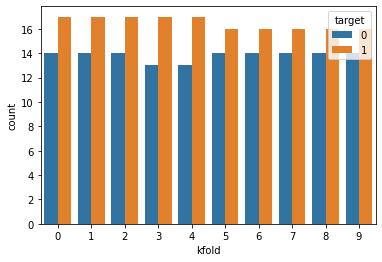

In [41]:
sns.countplot(x="kfold", hue="target", data=folds);

We see that we have roughly the same number of observations in each fold, and a roughly equal distribution of target vs nontarget from fold to fold. These are defining characteristics of a stratified cross validation scheme.

# Simple Regresison Models

Our main goal is to try to predict whether a patient has heart disease through a classifier. First, I want to show why using a typical regresison technique such as <b>Linear Regression</b> or <b>Logistic Regression</b> is not great, along with the differences between the two.


## Linear Regression
Linear regression is generally not a great choice for classification problems, but let's show why by doing the appropriate analysis.

### Preprocessing

We perform the following simple preprocessing steps:
- One Hot Encoding (the categorical variables that are nominal and non-binary)
- Scaling the features to the domain [0, 1].

In [42]:
# One Hot Encoding
## Columns observed to be suitable for One Hot Encoding
# columns ["sex", "fbs", "exang"] do not need one hot encoding as they are already boolean values (0 or 1).
ohe_features = ["cp", "restecg", "slope", "thal"]
folds_lin_reg = pd.get_dummies(folds, columns=ohe_features)

# Scaling
## By default the scaler scales values into the range 0-1
scaler = MinMaxScaler()
folds_lin_reg.loc[:, ~folds_lin_reg.columns.isin(['target', 'kfold'])] = scaler.fit_transform(folds_lin_reg.loc[:, ~folds_lin_reg.columns.isin(['target', 'kfold'])])

### Training and Predicting by fold

We will be doing something similar for each of our different models, so let's just make a function, <b>my_model_function</b> to do all of the work each time. The inputs to our function will be our data, initialized model to use, and a metric for measuring loss/accuracy. I have decided to use Mean Squared Error (mse) as our loss metric as it is appropriate for regression problems.

In [57]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import numpy as np

def my_model_function(data, model, metric):
    if isinstance(metric, str):
        metric = [metric]
    
    # Train our model and run against validation data
    oof_predictions = np.zeros((data.shape[0], 1))
    for fold in range(N_SPLITS):
        train_idx = data[data['kfold'] != fold].index
        val_idx = data[data['kfold'] == fold].index

        x_train = data.iloc[train_idx].drop(columns=['target', 'kfold'])
        y_train = data.iloc[train_idx][['target']]

        x_valid = data.iloc[val_idx].drop(columns=['target', 'kfold'])
        y_valid = data.iloc[val_idx][['target']]

        our_model = model.fit(x_train, y_train.values.ravel())
        y_pred = our_model.predict(x_valid).reshape(-1, 1)
        oof_predictions[val_idx] = y_pred
    
    # Calculate and display results for our model     
    if "mse" in metric:
        mse = metrics.mean_squared_error(data['target'].values, oof_predictions)
        print(f"Mean Squared Error: {round(mse, 2)}")
        
    if "roc" in metric:
        fpr, tpr, threshold = metrics.roc_curve(data['target'].values, oof_predictions)
        roc_auc = metrics.auc(fpr, tpr)
        print(f"Using {model}, we get an AUC of {round(100*roc_auc, 2)}%")

        plt.title(f'{model} ROC Curve')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    return our_model, oof_predictions

In [59]:
lin_reg_m, y_pred = my_model_function(folds_lin_reg, LinearRegression(), "mse");

Mean Squared Error: 0.13


This shows that our Linear Regression model has a Mean Squared Error of 0.13. This value is not great and shows that a linear regresison model is not a great choice. Let's visually show why this is the case by first transforming our data to less dimensions using PCA.

### Linear Regression after PCA (1D)
We can reduce our features to 1D and visually show that a linear equation is not too great for boolean targets.

In [45]:
# pca transform our data
pca = PCA(n_components=1)
pca_results = pca.fit_transform(folds_lin_reg.drop(columns=['target', 'kfold']))

# pca_df with feature and target
pca_df = pd.DataFrame()
pca_df['pca-comp1'] = pca_results[:,0]
pca_df['y_true'] = folds_lin_reg[['target']]

# predict our targets and put in our pca_df
lin_pca_reg_model = LinearRegression().fit(pca_df[['pca-comp1']].values, pca_df['y_true'].values)
pca_df['y_pred'] = lin_pca_reg_model.predict(pca_df[['pca-comp1']])

After transforming our data, we can plot the 1D feature representaiton as our x-axis, and our targets as our y-axis as shown below:

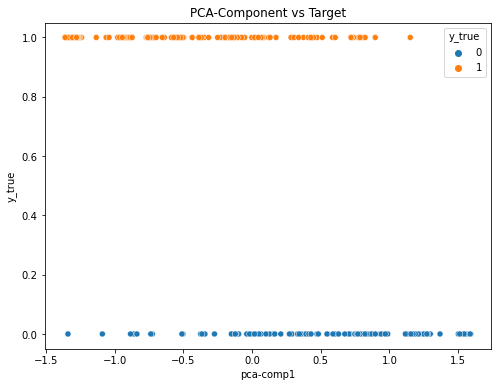

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca-comp1', y='y_true',
    hue="y_true",
    data=pca_df,
    legend="full");

plt.title("PCA-Component vs Target");

Now let's plot the linear regression line over this.

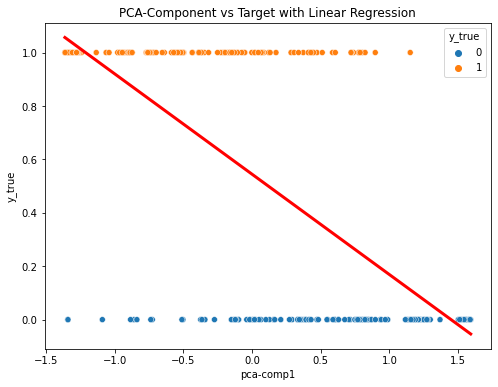

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca-comp1', y='y_true',
    hue="y_true",
    data=pca_df,
    legend="full");

pca_df = pca_df.sort_values(by=['pca-comp1'])

plt.plot(pca_df['pca-comp1'].values, 
         pca_df['y_pred'].values,
         color='red', linewidth=3);

plt.title("PCA-Component vs Target with Linear Regression");

We can see why linear regression did not score well. There is no reasonable way to have good accuracy using a straight line to match this set (or most sets) of boolean data. Logistic regression can sometimes fit these problems well, but let's see if that is the case here.

## Logistic Regression

### Preprocessing

We perform the following simple preprocessing steps:
- One Hot Encoding (the categorical variables that are nominal and non-binary)
- Scaling the features to the domain [0, 1].

In [48]:
# One Hot Encoding
## Columns observed to be suitable for One Hot Encoding
# columns ["sex", "fbs", "exang"] do not need one hot encoding as they are already boolean values (0 or 1).
ohe_features = ["cp", "restecg", "slope", "thal"]
folds_log_reg = pd.get_dummies(folds, columns=ohe_features)

# Scaling
## By default the scaler scales values into the range 0-1
scaler = MinMaxScaler()
folds_log_reg.loc[:, ~folds_log_reg.columns.isin(['target', 'kfold'])] = scaler.fit_transform(folds_log_reg.loc[:, ~folds_log_reg.columns.isin(['target', 'kfold'])])

### Training and Predicting by fold

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg_m, y_pred = my_model_function(folds_log_reg, LogisticRegression(), "mse");

Mean Squared Error: 0.18


Logistic Regression scored slightly worse than linear regression. Let's plot the logistic curve to see why.

### Logistic Regression after PCA (1D)
We can plot the logistic regresison curve against the 1D PCA component, just like we did with the linear regression line previously.

In [50]:
# pca transform our data
pca = PCA(n_components=1)
pca_results = pca.fit_transform(folds_log_reg.drop(columns=['target', 'kfold']))

# pca_df with feature and target
pca_df = pd.DataFrame()
pca_df['pca-comp1'] = pca_results[:,0]
pca_df['y_true'] = folds_log_reg[['target']]

# predict our targets and put in our pca_df
log_pca_reg_model = LogisticRegression().fit(pca_df[['pca-comp1']].values, pca_df['y_true'].values.ravel())
pca_df['y_pred'] = log_pca_reg_model.predict(pca_df[['pca-comp1']]).reshape(-1, 1)

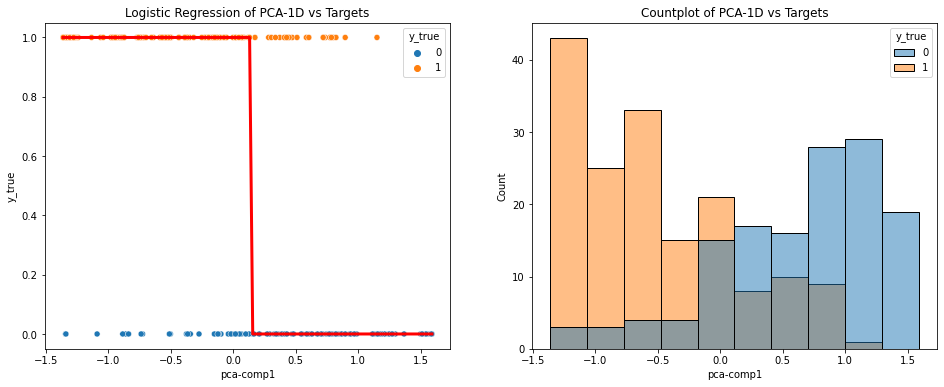

In [51]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.scatterplot(
    x='pca-comp1', y='y_true',
    hue="y_true",
    data=pca_df,
    legend="full");
pca_df = pca_df.sort_values(by=['pca-comp1'])
plt.plot(pca_df['pca-comp1'].values, 
         pca_df['y_pred'].values,
         color='red', linewidth=3);
plt.title('Logistic Regression of PCA-1D vs Targets');

plt.subplot(122)
sns.histplot(data=pca_df, x='pca-comp1', hue='y_true', bins=10);
plt.title('Countplot of PCA-1D vs Targets');

The crossover point for the logistic regression is at about 0.2. Anywhere to the left is more likely to have heart disease and anywhere to the right is more likely to not have heart disease. This corresponds to our countplot of the 1st PCA component in section 6.4.1 reshown above.

# Simple Classifier Models

We have explored some basic regression techniques and shown, graphically, what these regression equations represent. Now let's do some classification using a couple intuitive models:
- Support Vector Machines (SVM)
- K-nearest neighbors (KNN)

## SVM - Reword
Try classifying with data.
Then do again on 2d PCA representation and show boundaries.

### Preprocessing

We perform the following simple preprocessing steps:
- One Hot Encoding (the categorical variables that are nominal and non-binary)
- Scaling the features to the domain [0, 1].

In [60]:
# One Hot Encoding
## Columns observed to be suitable for One Hot Encoding
# columns ["sex", "fbs", "exang"] do not need one hot encoding as they are already boolean values (0 or 1).
ohe_features = ["cp", "restecg", "slope", "thal"]
folds_svm = pd.get_dummies(folds, columns=ohe_features)

# Scaling
## By default the scaler scales values into the range 0-1
scaler = MinMaxScaler()
folds_svm.loc[:, ~folds_svm.columns.isin(['target', 'kfold'])] = scaler.fit_transform(folds_svm.loc[:, ~folds_svm.columns.isin(['target', 'kfold'])])

### Training and Predicting by Fold

Mean Squared Error: 0.17
Using SVC(gamma='auto'), we get an AUC of 83.19%


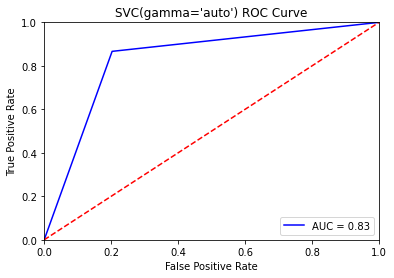

In [71]:
from sklearn.svm import SVC
svm_m, y_pred = my_model_function(folds_svm, SVC(gamma='auto'), ["mse", "roc"]);

With default settings we get a similar score to our regression for mean squared error, with a not very impressive AUC for the ROC Curve. Like we did with our regresison techniques, let's reduce the dimensions of our feature space to make plotting more clear.

### SVM after PCA (2D)

In [75]:
# pca transform our data
pca = PCA(n_components=2)
pca_results = pca.fit_transform(folds_svm.drop(columns=['target', 'kfold']))

# pca_df with feature and target
pca_df = pd.DataFrame()
pca_df['pca-comp1'] = pca_results[:,0]
pca_df['pca-comp2'] = pca_results[:,1]
pca_df['y_true'] = folds_svm[['target']]

# predict our targets and put in our pca_df
svm_model = SVC(gamma='auto').fit(pca_df[['pca-comp1', 'pca-comp2']].values, pca_df['y_true'].values)
pca_df['y_pred'] = svm_model.predict(pca_df[['pca-comp1', 'pca-comp2']].values)

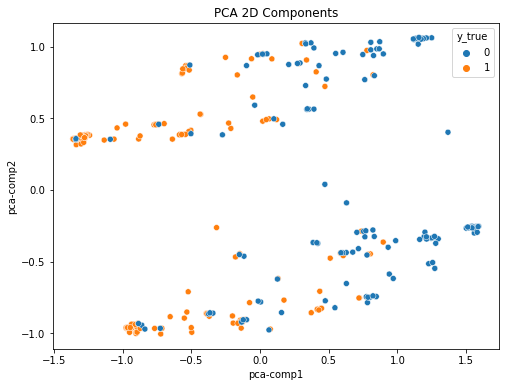

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca-comp1', y='pca-comp2',
    hue="y_true",
    data=pca_df,
    legend="full");

plt.title("PCA 2D Components");

In [81]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [82]:
X = pca_df[['pca-comp1', 'pca-comp2']].values
y = pca_df[['y_true']].values

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [83]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

This plotting function is available on the sklearn help page:
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html


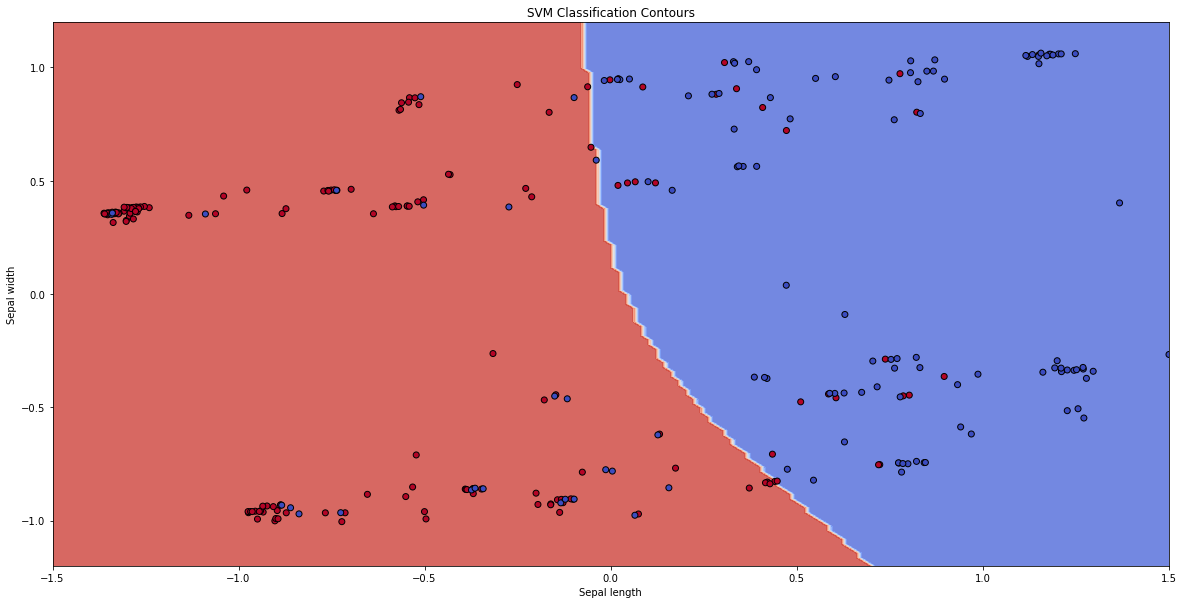

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.2, 1.2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM Classification Contours");
print("This plotting function is available on the sklearn help page:")
print("https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html")

In [ ]:
 and the Area Under the ROC (AUC) as our metric.
- linear regression
- logistic regression
- svm
- knn
- random forest
- naive bayes